In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X=df.drop(['Outcome'], axis=1)
Y=df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

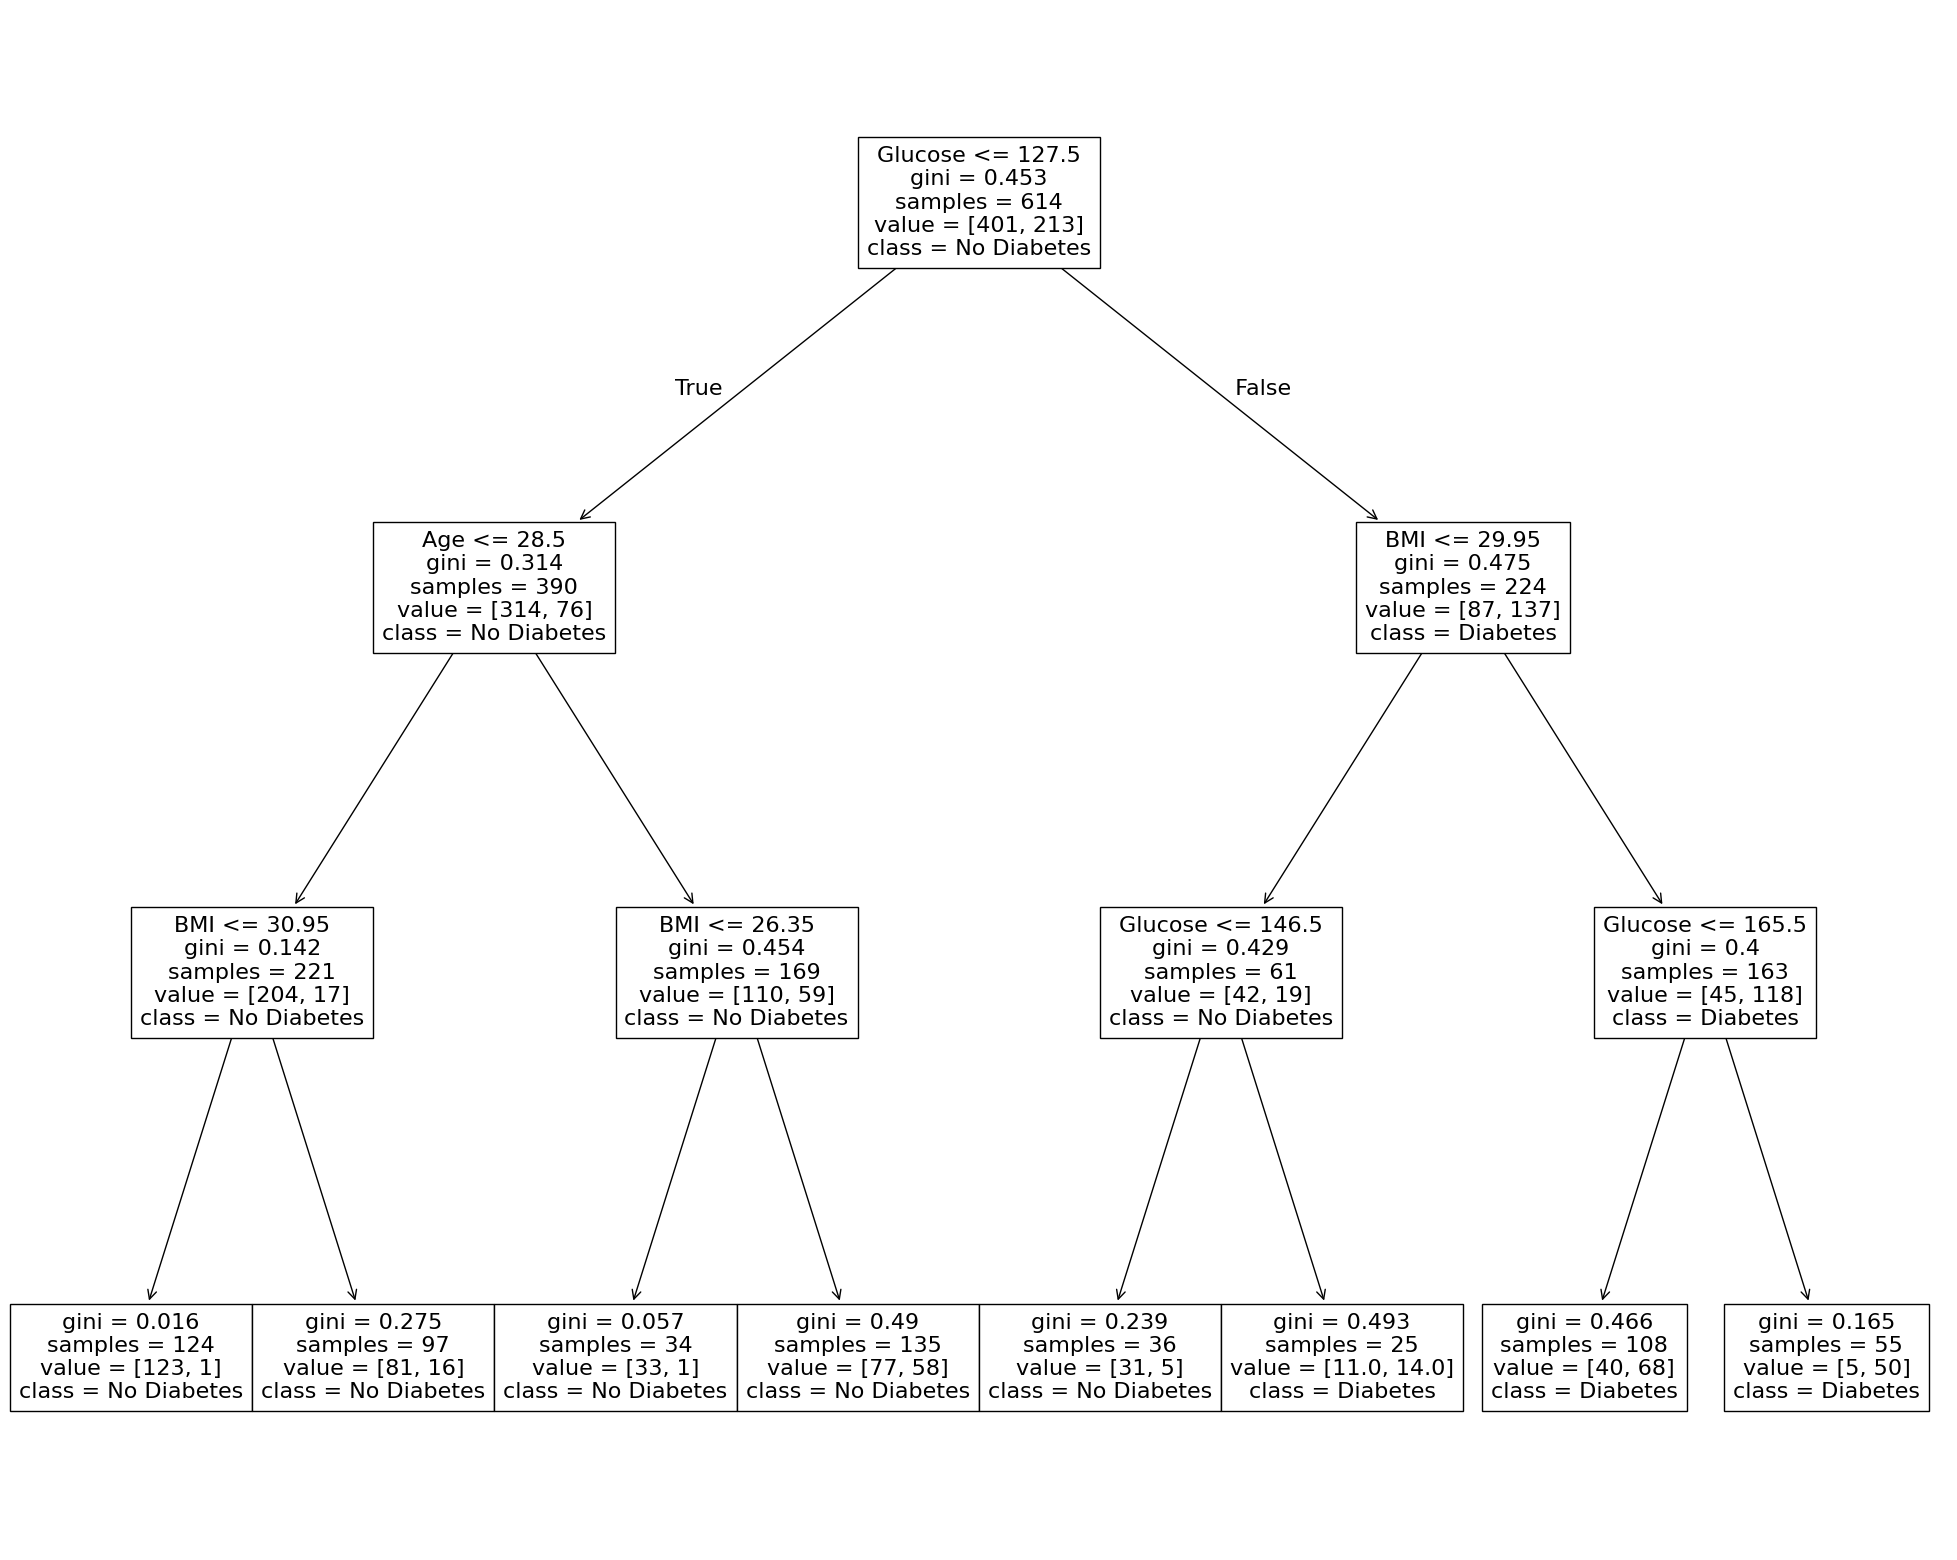

In [8]:
plt.figure(figsize=(25,20))
plot_tree(model,feature_names=X.columns,class_names=['No Diabetes','Diabetes'])
plt.show()

In [9]:
Y_pred=model.predict(X_test)

In [10]:
confusion_matrix(Y_test, Y_pred)

array([[83, 16],
       [21, 34]])

In [11]:
accuracy_score(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [12]:
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
Y_pred=model.predict(X_test)

In [14]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[80 19]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



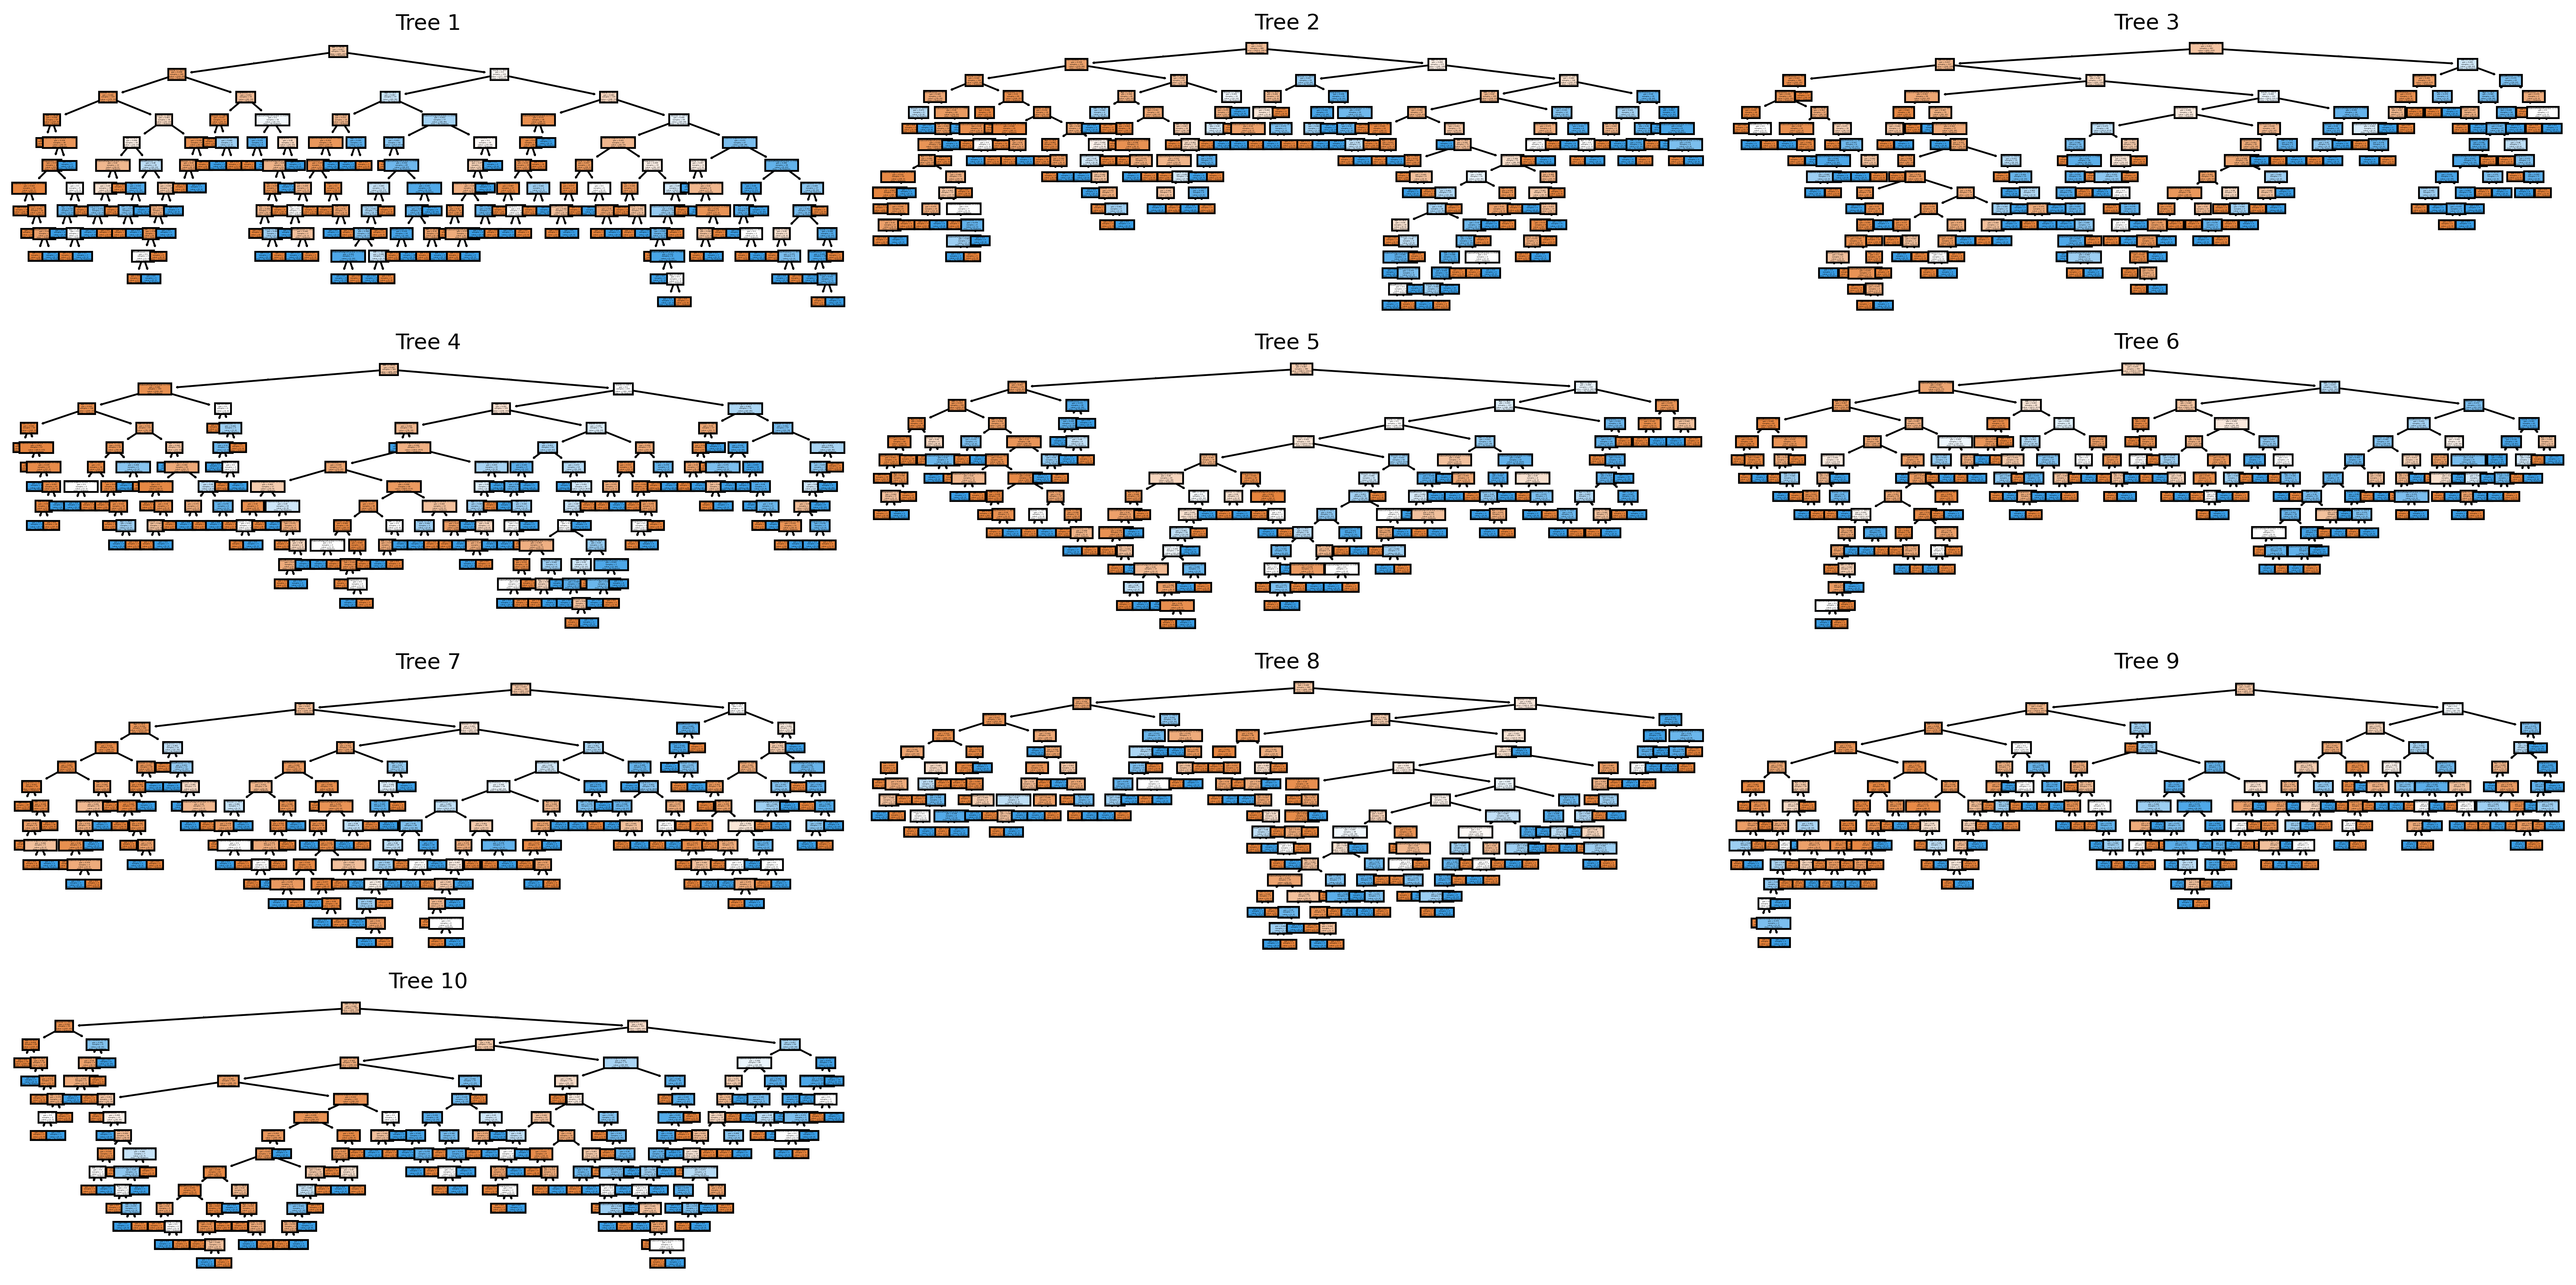

In [15]:
num_trees = len(model.estimators_)
cols=3
rows=(num_trees+cols-1)//cols
fig,axes=plt.subplots(rows,cols,figsize=(20,10),dpi=300)
axes=axes.flatten()
for i,tree in enumerate(model.estimators_):
    plot_tree(tree,feature_names=X.columns,class_names=['Diabetes','No Diabetes'],filled=True,ax=axes[i])
    axes[i].set_title(f"Tree {i+1}")
for j in range(i+1,rows*cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()